Health and Lifestyle Analysis

This project analyzes a dataset containing health and lifestyle information and groups people into clusters based on their habits and health indicators using K-Means clustering.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

Load dataset

In [28]:
df = pd.read_csv('health_lifestyle_dataset.csv')

Overview

In [29]:
print("Shape:", df.shape)
print("\nInfo:")
print(df.info())
print("\nMissing values per column:")
print(df.isnull().sum())
df.head()


Shape: (100000, 16)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 100000 non-null  int64  
 1   age                100000 non-null  int64  
 2   gender             100000 non-null  object 
 3   bmi                100000 non-null  float64
 4   daily_steps        100000 non-null  int64  
 5   sleep_hours        100000 non-null  float64
 6   water_intake_l     100000 non-null  float64
 7   calories_consumed  100000 non-null  int64  
 8   smoker             100000 non-null  int64  
 9   alcohol            100000 non-null  int64  
 10  resting_hr         100000 non-null  int64  
 11  systolic_bp        100000 non-null  int64  
 12  diastolic_bp       100000 non-null  int64  
 13  cholesterol        100000 non-null  int64  
 14  family_history     100000 non-null  int64  
 15  disease_risk       100000

,id,age,gender,bmi,daily_steps,sleep_hours,water_intake_l,calories_consumed,smoker,alcohol,resting_hr,systolic_bp,diastolic_bp,cholesterol,family_history,disease_risk
0,1,56,Male,20.5,4198,3.9,3.4,1602,0,0,97,161,111,240,0,0
1,2,69,Female,33.3,14359,9.0,4.7,2346,0,1,68,116,65,207,0,0
2,3,46,Male,31.6,1817,6.6,4.2,1643,0,1,90,123,99,296,0,0
3,4,32,Female,38.2,15772,3.6,2.0,2460,0,0,71,165,95,175,0,0
4,5,60,Female,33.6,6037,3.8,4.0,3756,0,1,98,139,61,294,0,0


Exploratory Data Analysis (EDA)

In [30]:
df.describe()

,id,age,bmi,daily_steps,sleep_hours,water_intake_l,calories_consumed,smoker,alcohol,resting_hr,systolic_bp,diastolic_bp,cholesterol,family_history,disease_risk
count,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,48.525990,29.024790,10479.87029,6.491784,2.751496,2603.341200,0.200940,0.300020,74.457420,134.58063,89.508850,224.300630,0.299150,0.248210
std,28867.657797,17.886768,6.352666,5483.63236,2.021922,1.297338,807.288563,0.400705,0.458269,14.423715,25.95153,17.347041,43.327749,0.457888,0.431976
min,1.000000,18.000000,18.000000,1000.00000,3.000000,0.500000,1200.000000,0.000000,0.000000,50.000000,90.00000,60.000000,150.000000,0.000000,0.000000
25%,25000.750000,33.000000,23.500000,5729.00000,4.700000,1.600000,1906.000000,0.000000,0.000000,62.000000,112.00000,74.000000,187.000000,0.000000,0.000000
50%,50000.500000,48.000000,29.000000,10468.00000,6.500000,2.800000,2603.000000,0.000000,0.000000,74.000000,135.00000,89.000000,224.000000,0.000000,0.000000
75%,75000.250000,64.000000,34.500000,15229.00000,8.200000,3.900000,3299.000000,0.000000,1.000000,87.000000,157.00000,105.000000,262.000000,1.000000,0.000000
max,100000.000000,79.000000,40.000000,19999.00000,10.000000,5.000000,3999.000000,1.000000,1.000000,99.000000,179.00000,119.000000,299.000000,1.000000,1.000000


Data Preprocessing

Encode categorical data

In [31]:
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])

Drop ID if not needed

In [32]:
df = df.drop(columns=['id'], errors='ignore')

Handle missing values if any

In [33]:
df = df.fillna(df.mean())

Scale features

In [34]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop(columns=['disease_risk']))
X_scaled = pd.DataFrame(scaled_features, columns=df.drop(columns=['disease_risk']).columns)

X_scaled.head()

,age,gender,bmi,daily_steps,sleep_hours,water_intake_l,calories_consumed,smoker,alcohol,resting_hr,systolic_bp,diastolic_bp,cholesterol,family_history
0,0.417853,0.997363,-1.341930,-1.145573,-1.281848,0.499875,-1.240382,-0.501468,-0.654685,1.562891,1.018033,1.238900,0.362342,-0.653329
1,1.144651,-1.002643,0.672982,0.707405,1.240517,1.501933,-0.318774,-0.501468,1.527452,-0.447697,-0.715978,-1.412862,-0.399299,-0.653329
2,-0.141222,0.997363,0.405377,-1.579777,0.053522,1.116526,-1.189594,-0.501468,1.527452,1.077577,-0.446243,0.547136,1.654822,-0.653329
3,-0.923927,-1.002643,1.444316,0.965082,-1.430222,-0.579263,-0.177560,-0.501468,-0.654685,-0.239705,1.172167,0.316548,-1.137859,-0.653329
4,0.641484,-1.002643,0.720207,-0.810210,-1.331306,0.962363,1.427822,-0.501468,1.527452,1.632221,0.170294,-1.643450,1.608662,-0.653329


Visualizations

Age Distribution

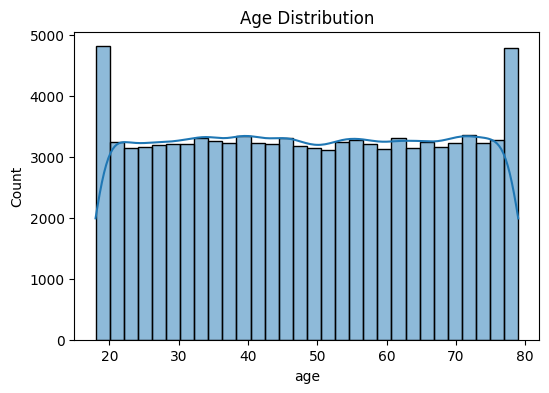

In [35]:
plt.figure(figsize=(6,4))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

Daily Steps vs BMI:Scatter plot for BMI

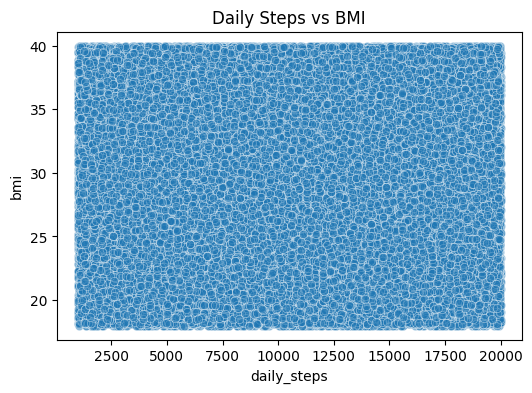

In [36]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='daily_steps', y='bmi', data=df, alpha=0.5)
plt.title('Daily Steps vs BMI')
plt.show()

Sleep Hours Distribution

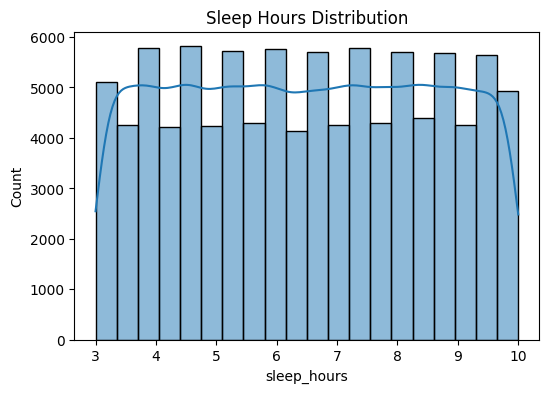

In [37]:
plt.figure(figsize=(6,4))
sns.histplot(df['sleep_hours'], bins=20, kde=True)
plt.title('Sleep Hours Distribution')
plt.show()

Applying K-means clustering

In [38]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

PCA for visualization

In [39]:
pca = PCA(2)
pca_data = pca.fit_transform(X_scaled)
df['pca1'], df['pca2'] = pca_data[:,0], pca_data[:,1]

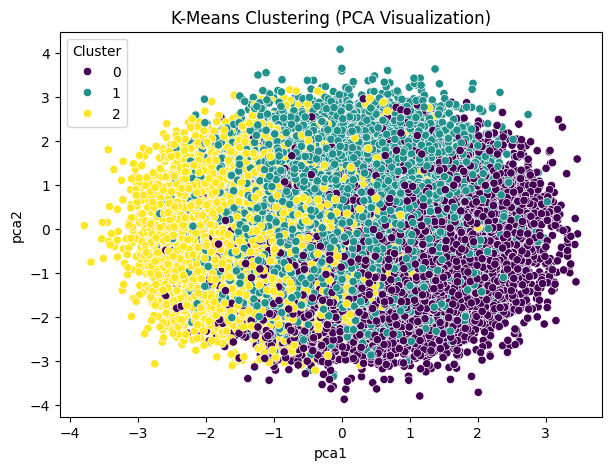

In [40]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='pca1', y='pca2', hue='Cluster', data=df, palette='viridis')
plt.title('K-Means Clustering (PCA Visualization)')
plt.show()